# Washington Houses 

This notebook walks you through how I analize this dataset to make predictions on it

## Import the library

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Load the dataset


In [3]:
housing = pd.read_excel("HouseData.xlsx")

In [4]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,20140911T000000,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215


We will drop the `Id` column as it is not necessary for model training.

In [5]:
housing = housing.drop('id', axis=1)
housing.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227


We can inspect the types of feature columns using the following code:

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21060 non-null  int64  
 1   date         21060 non-null  object 
 2   price        21060 non-null  int64  
 3   bedrooms     21060 non-null  int64  
 4   bathrooms    21060 non-null  float64
 5   sqft_living  21060 non-null  int64  
 6   sqft_lot     21060 non-null  int64  
 7   floors       21060 non-null  float64
 8   waterfront   21060 non-null  object 
 9   view         21060 non-null  object 
 10  condition    21060 non-null  object 
 11  grade        21060 non-null  int64  
 12  yr_built     21060 non-null  int64  
 13  zipcode      21060 non-null  int64  
 14  lat          21060 non-null  float64
 15  long         21060 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 2.6+ MB


In [6]:
housing["waterfront"].value_counts()

waterfront
No     20976
Yes       84
Name: count, dtype: int64

In [7]:
housing["view"].value_counts()

view
No View      19226
Average        894
Good           436
Fair           302
Excellent      202
Name: count, dtype: int64

In [9]:
housing["condition"].value_counts()

condition
Average             13684
Good                 5546
Very Good            1630
Fair- Badly worn      171
Poor- Worn out         29
Name: count, dtype: int64

In [10]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,zipcode,lat,long
count,2.106000e+04,21060.000000,21060.000000,21060.000000,2.106000e+04,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000
mean,5.002696e+05,3.343162,2.077991,2019.486942,1.474301e+04,1.484924,7.590123,1970.919943,98078.383761,47.558542,-122.213544
std,2.465775e+05,0.882395,0.729351,822.018441,3.995697e+04,0.538113,1.095947,29.265667,53.406460,0.139776,0.141789
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,7.000000,1951.000000,98033.000000,47.465700,-122.330000
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.553500e+03,1.000000,7.000000,1975.000000,98065.000000,47.569200,-122.231000
75%,6.250000e+05,4.000000,2.500000,2490.000000,1.045400e+04,2.000000,8.000000,1996.000000,98118.000000,47.678925,-122.123000
max,1.495000e+06,7.000000,6.750000,7480.000000,1.651359e+06,3.500000,12.000000,2015.000000,98199.000000,47.777600,-121.315000


# Discover and Visualize the Data to Gain Insights
## Visualizing Geographical Data

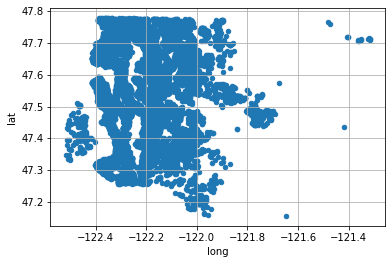

In [8]:
housing.plot(kind="scatter", x="long", y="lat", grid=True)
plt.show()

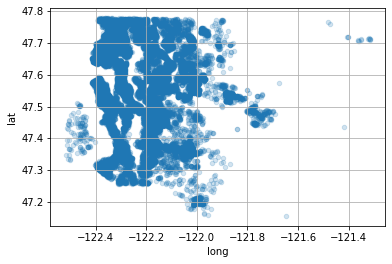

In [9]:
housing.plot(kind="scatter", x="long", y="lat", grid=True, alpha=0.2)
plt.show()

# Looking for Correlations


In [10]:
corr_matrix = housing.corr(numeric_only=True)

In [11]:
corr_matrix["price"].sort_values(ascending=False)


price          1.000000
grade          0.664945
sqft_living    0.655868
bathrooms      0.486032
lat            0.395757
bedrooms       0.317381
floors         0.278561
sqft_lot       0.087083
yr_built       0.060192
long           0.050107
id            -0.004038
zipcode       -0.024780
Name: price, dtype: float64

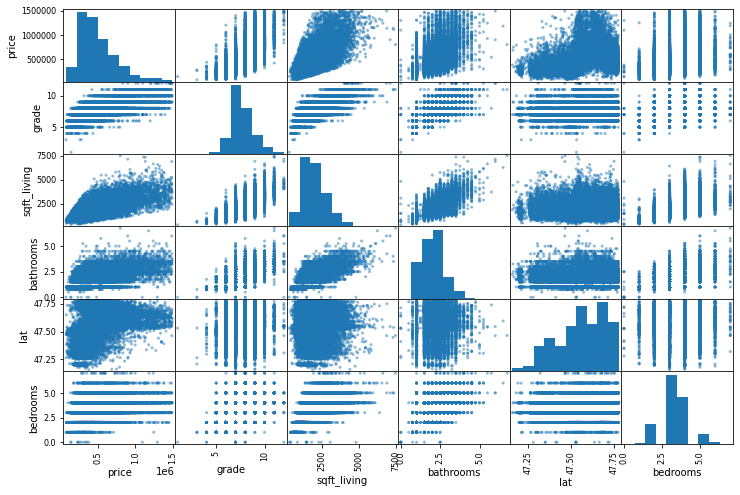

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["price", "grade", "sqft_living", "bathrooms","lat","bedrooms"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

## Data Cleaning

In [13]:
housing = housing.dropna()

In [14]:
housing.isnull().sum()


id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

## OneHotEncoder – For Label categorical features


In [15]:
from sklearn.preprocessing import OneHotEncoder
 
s = (housing.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['date', 'waterfront', 'view', 'condition']
No. of. categorical features:  4


In [16]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(housing[object_cols]))
OH_cols.index = housing.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = housing.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

## Splitting Dataset into Training and Testing

This dataset contains a mix of numeric, categorical and missing features.

In [17]:
df_final.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,zipcode,...,view_Average,view_Excellent,view_Fair,view_Good,view_No View,condition_Average,condition_Fair- Badly worn,condition_Good,condition_Poor- Worn out,condition_Very Good
0,629000615,1495000,4,3.25,3070,10375,2.0,10,1962,98004,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,4141800215,1495000,4,3.75,3770,4000,2.5,9,1916,98122,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,6448000020,1490000,4,2.50,2420,18480,1.0,9,1967,98004,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,9522300010,1490000,3,3.50,4560,14608,2.0,12,1990,98034,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,31000165,1490000,5,3.50,3620,7821,2.0,10,1958,98040,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['price',"floors","sqft_lot","yr_built","long","id","zipcode"], axis=1)
Y = df_final['price']
 
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy
I have to train the model to determine the continuous values, so we will be using these regression models.

* M-Support Vector Machine
* Random Forest Regressor
* Linear Regressor


In [19]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.4098412440644097


In [20]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.1621518538503919

In [21]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.22763242844123105
